# Calories Burnt Prediction
This file contains project: Calories Burnt Prediction Using Machine Learning In this project we are using Data freely available on Kaggle:https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos

## Problem Statement 
Calculation of calories burt while exercising is an important part of exercice. It helps onw to keep track of how is one improving. These days there are multiple moredern day devices which can detect calories burnt during an exercise session. But those devices are not in reach of everybody hence by making this model it will become easy for a person to predict how many calories he or she burnt During stipulated time.

## About Dataset 
The Dataset contains 2 files 
1. exercise.csv
    
    Contains 8 columns
    - User_ID
    - Gender
    - Age
    - Height
    - Weight
    - Duration
    - Heart_Rate
    - Body_Temp
2. calories.csv
    
    Contains 2 column
    - User_ID
    - Calories



## Importing Libraries and Dependencies

In [1]:
# Normal Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
## Model related extra imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [3]:
# Model Imports
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Data Collection

Reading Calories.csv file this is our target variable and user id can be used as forign key for other file

In [4]:
calories = pd.read_csv("calories.csv")

In [5]:
calories.sample(5)

,User_ID,Calories
5927,18677336,121.0
10398,19049421,104.0
12889,16878529,97.0
4784,14315428,88.0
14390,16061779,213.0


Reading Exercise.csv this is our data part which is used to predict target variable

In [6]:
exercise_data = pd.read_csv("exercise.csv")

In [7]:
exercise_data.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
12667,18667088,male,35,170.0,73.0,5.0,87.0,39.3
212,14217831,female,32,159.0,63.0,23.0,103.0,40.3
1860,16573075,female,46,155.0,60.0,10.0,98.0,39.8
8123,16029747,female,76,187.0,93.0,16.0,90.0,40.5
6120,11600131,male,57,188.0,90.0,5.0,81.0,38.9


As there is a relation between both files lets make this as one data dataset

As the sequence of the data stored is same hance no need to make a complex query simple concat will do

In [8]:
# concatinating datasets to form one dataset
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [9]:
calories_data.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
4951,19335230,female,46,169.0,72.0,4.0,86.0,38.6,17.0
5925,14171560,female,30,177.0,73.0,19.0,88.0,40.5,77.0
14337,11540819,female,58,165.0,63.0,24.0,107.0,40.7,161.0
4785,16891781,female,30,163.0,58.0,19.0,92.0,40.3,89.0
124,15444304,male,67,201.0,96.0,18.0,105.0,40.5,143.0


Checking Shape of the dataset 

In [10]:
calories_data.shape

(15000, 9)

There are 15000 diffrent data present

In [11]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


## Data Analysis and Feature engneering

Seeing list of columns we have in our dataset

In [12]:
list(calories_data.columns)

['User_ID',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories']

There is no particualr use of UserID here hence we can drop it

In [13]:
calories_data.drop(columns=["User_ID"],inplace=True)

In [14]:
calories_data.shape

(15000, 8)

In [15]:
calories_data.sample(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
10788,male,48,210.0,114.0,20.0,102.0,40.4,140.0
10922,female,20,147.0,48.0,21.0,100.0,40.5,116.0
13729,female,43,157.0,61.0,7.0,88.0,39.1,31.0
11355,male,69,188.0,92.0,17.0,91.0,40.2,100.0
14183,female,25,155.0,59.0,19.0,93.0,40.3,89.0


In [16]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


### Handeling Missing values

Lets check for Missing values

In [17]:
calories_data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

There is no missing values that is a good sign

### Handeling Duplicate values

Lets check for duplicate values

In [18]:
calories_data.duplicated().sum()

1

One data is duplicate lets remove that

In [19]:
calories_data.drop_duplicates(inplace=True)

In [20]:
calories_data.shape

(14999, 8)

Statistical Analysis of the data

In [21]:
calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,42.790786,174.465831,74.967931,15.531035,95.518901,40.025488,89.542836
std,16.980401,14.258333,15.035593,8.319310,9.583542,0.779244,62.457750
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [22]:
sb.set() # this is to provide grid lines to our visualization

Lets work on columns one by one starting with gender

<AxesSubplot: title={'center': 'Gender'}>

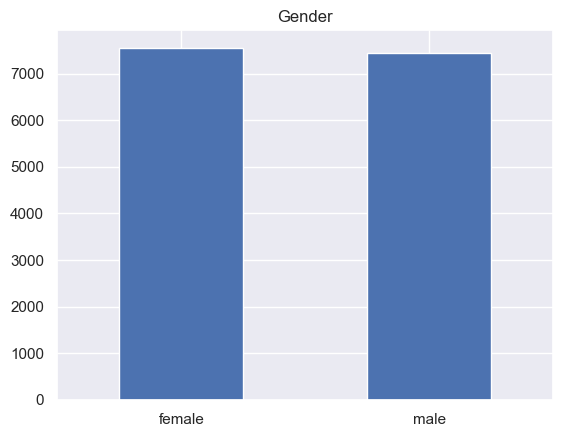

In [23]:
calories_data["Gender"].value_counts().plot(kind = "bar", title= "Gender", rot = 0)

There are nearly same number of male and females in the data

Lets work on Age now

C:\Users\GAUR\AppData\Local\Temp\ipykernel_24692\1963452984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data["Age"])


<AxesSubplot: xlabel='Age', ylabel='Density'>

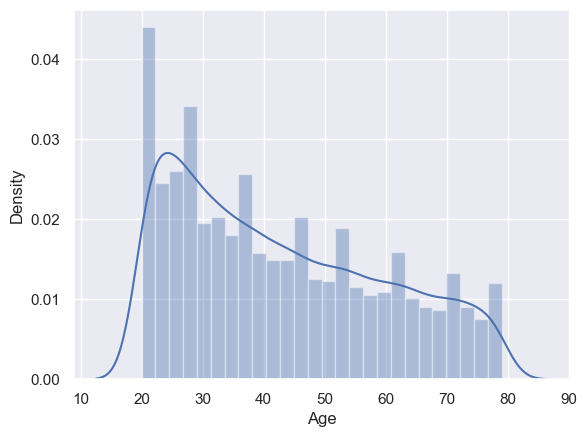

In [24]:
sb.distplot(calories_data["Age"])

As age increasese people tend to decrese there exercise

C:\Users\GAUR\AppData\Local\Temp\ipykernel_24692\4185076356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data["Height"])


<AxesSubplot: xlabel='Height', ylabel='Density'>

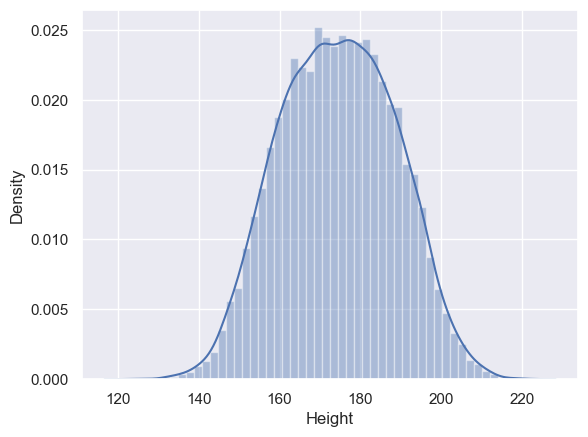

In [25]:
sb.distplot(calories_data["Height"])

Data is properly distributed so we have data for all heights

C:\Users\GAUR\AppData\Local\Temp\ipykernel_24692\2630700759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data["Weight"])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

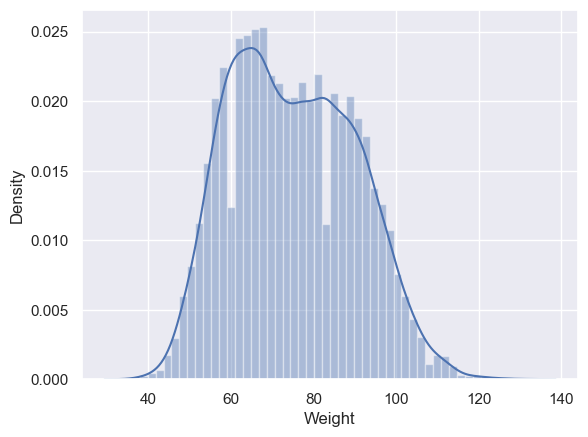

In [26]:
sb.distplot(calories_data["Weight"])

No Skewness good distribution no work needed

C:\Users\GAUR\AppData\Local\Temp\ipykernel_24692\463631448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data["Body_Temp"])


<AxesSubplot: xlabel='Body_Temp', ylabel='Density'>

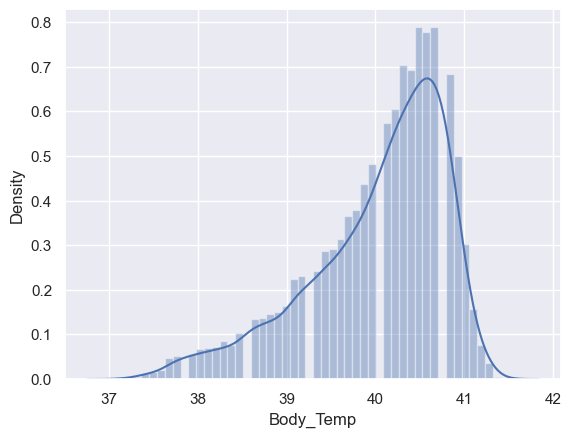

In [27]:
sb.distplot(calories_data["Body_Temp"])

C:\Users\GAUR\AppData\Local\Temp\ipykernel_24692\2179086576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data["Duration"])


<AxesSubplot: xlabel='Duration', ylabel='Density'>

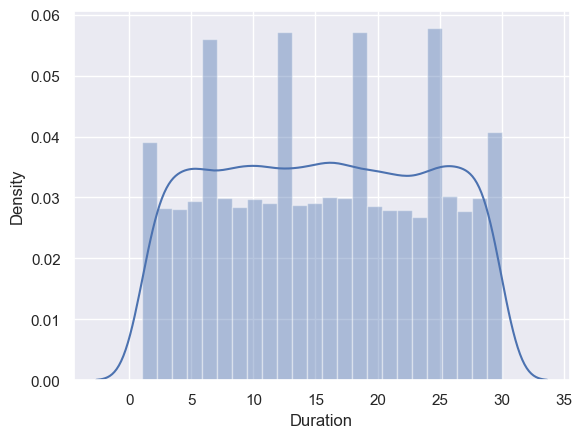

In [28]:
sb.distplot(calories_data["Duration"])

Properly distributed data no work needed

C:\Users\GAUR\AppData\Local\Temp\ipykernel_24692\207320579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data["Heart_Rate"])


<AxesSubplot: xlabel='Heart_Rate', ylabel='Density'>

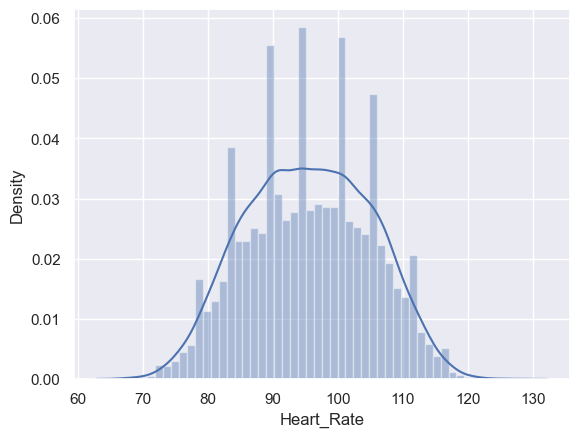

In [29]:
sb.distplot(calories_data["Heart_Rate"])

properly distributed data

C:\Users\GAUR\AppData\Local\Temp\ipykernel_24692\1957639242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(calories_data["Calories"])


<AxesSubplot: xlabel='Calories', ylabel='Density'>

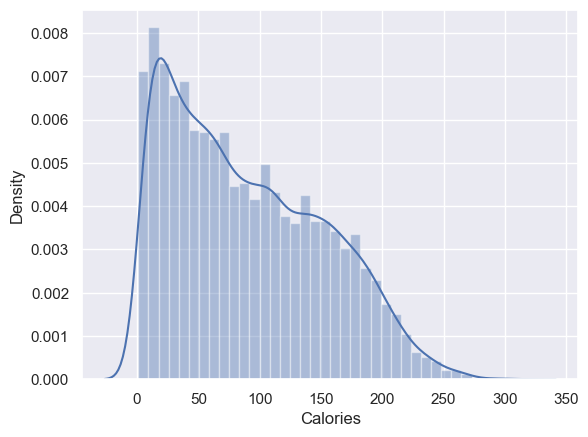

In [30]:
sb.distplot(calories_data["Calories"])

### Correlation

C:\Users\GAUR\AppData\Local\Temp\ipykernel_24692\4293590540.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


<AxesSubplot: >

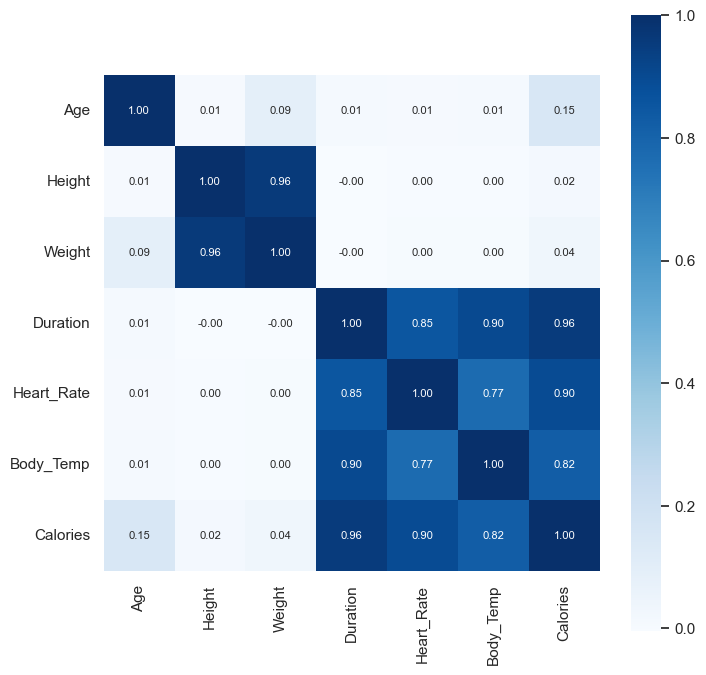

In [31]:
correlation = calories_data.corr()
plt.figure(figsize=(8,8))
sb.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

<AxesSubplot: title={'center': 'Coorelation of Calories with diffrent columns'}>

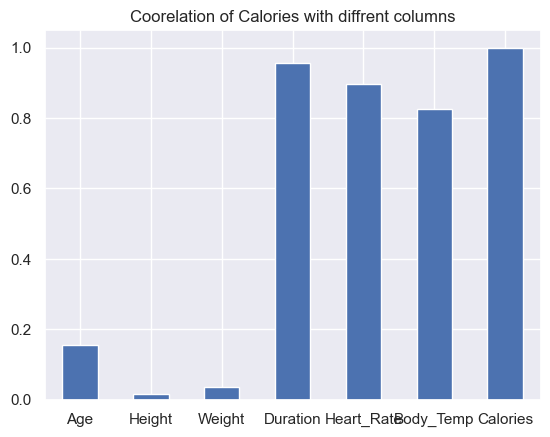

In [32]:
correlation["Calories"].plot(kind = "bar", title ="Coorelation of Calories with diffrent columns", rot =0)

In [33]:
correlation["Calories"]

Age           0.154356
Height        0.017499
Weight        0.035426
Duration      0.955419
Heart_Rate    0.897880
Body_Temp     0.824552
Calories      1.000000
Name: Calories, dtype: float64

From the above graph and table we can say height and weight don't have very strong coorrelation with the calories hence if we want we can remove the columns but as we can see there is high correaltion of these columns with others we are keeping them for a while

As we can see gender is a categorical value lets change it to numerical so that our models can train on it more easily

In [34]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [35]:
calories_data.sample(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
6148,0,22,187.0,87.0,11.0,96.0,39.8,47.0
6051,0,68,172.0,74.0,23.0,94.0,40.6,135.0
7697,1,44,156.0,62.0,15.0,93.0,39.8,75.0
7651,1,51,178.0,74.0,23.0,95.0,40.6,119.0
2324,1,22,151.0,54.0,17.0,100.0,40.2,93.0


## Seprating Data and Label

Y(Label): Value to be predicted ie Calories

X(Data): Data used to predict Y

In [36]:
X = calories_data.drop(columns=['Calories'], axis=1)
Y = calories_data['Calories']

In [37]:
X.sample(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14057,1,69,169.0,67.0,30.0,113.0,40.8
13768,1,31,161.0,62.0,9.0,93.0,39.4
11437,1,25,172.0,70.0,16.0,92.0,40.6
8284,1,73,153.0,56.0,9.0,84.0,39.7
7758,1,24,145.0,48.0,18.0,91.0,40.5


In [38]:
Y.sample(5)

8793     31.0
3903     10.0
347      20.0
12308    49.0
7492     15.0
Name: Calories, dtype: float64

In [39]:
print(X.shape, Y.shape)

(14999, 7) (14999,)


## Train Test Spilt

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [41]:
print(X.shape, X_test.shape,X_train.shape)

(14999, 7) (3000, 7) (11999, 7)


## Model Selection, Model Traing and Model Evaluation

Linear Regression

In [42]:
step1 = LinearRegression()

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9642733474461301
MAE 8.693609155317967


Ridge Regression

In [43]:
step1 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9642770695575135
MAE 8.691955078571429


Lasso Regression

In [44]:
step1 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9642743568726077
MAE 8.69328590729093


KNN

In [45]:
step1 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9854042919300708
MAE 5.462444444444445


SVM

In [ ]:
step1 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Random Forest

In [ ]:
step1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

## Making Pikle file for Model

In [ ]:
# Make ing of .pkl file